# Imports

In [2]:
import numpy as np
from agent import RL_Agent_v1
from env_versions import env_v1
import matplotlib.pyplot as plt
import time
import sys

## Training

In [3]:
def train_v1(env, agent, max_episode_num = 5000, max_steps = 99, save_file = "RL_agent",
             e_greedy = -1, e_max = 1, e_min = 0.5, e_decay_rate = 0.01, clip_update = 10, show_every = 10, save_every = 10):
    start_time = time.time()
    all_rewards = []
    # optimizer = optim.RMSprop(agent.parameters())
    for episode in range(max_episode_num):
        env.reset()
        rewards = []
        state = np.concatenate( (env.air_hockey.ball_pos, env.air_hockey.ball_vel, env.air_hockey.self_hand_pos)  )
        if(e_greedy != -1):
            e_greedy = e_min + (e_max - e_min)*np.exp(-e_decay_rate*episode)

        for steps in range(max_steps):
            action = agent.get_action(state, e_greedy)
            new_state, reward, done, _ = env.step(action)
            rewards.append(reward)
            agent.step( state, action, done, new_state, reward )
            if done:
                break
            state = new_state
        all_rewards.append(np.sum(rewards))
        
        if (episode+1) % show_every == 0:
            sys.stdout.write("episode: {}, total reward: {}, last_average_reward: {}, time: {}\n".format(episode, np.round(np.sum(rewards), decimals = 3),  
                    np.round(np.mean(all_rewards[-10:]), decimals = 3), time.time()-start_time))
            
        if ( episode+1 ) % save_every == 0:        # update the clipped
            agent.save_model(save_file)

        if ( episode+1 ) % clip_update == 0:        # update the clipped
            agent.clipped.load_state_dict( agent.agent.state_dict() )


    plt.figure()
    plt.subplot(111)
    plt.plot(all_rewards)
    plt.xlabel('Episode')
    plt.ylabel('Rewards')
    plt.show()


## Rendering

In [4]:
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

def render(episode, env):
    
    fig = plt.figure()
    img = plt.imshow(env.draw())
    plt.axis('off')

    def animate(i):
        img.set_data(episode[i])
        return img,

    anim = FuncAnimation(fig, animate, frames=len(episode), interval=100, blit=True)
    html = HTML(anim.to_jshtml())
    
    plt.close(fig)
    # os.remove(None0000000.png)
    
    return html

def run_fixed_episode(env, agent, max_steps = 99, init_state = 1):
    frames = []
    env.reset()
    done = False
    total_reward = 0
    state = np.concatenate( (env.air_hockey.ball_pos, env.air_hockey.ball_vel, env.air_hockey.self_hand_pos)  )
    for i in range(max_steps):
        observation = env.draw()
        frames.append( observation )
        action = agent.get_action( state )
        state, reward, done, __ = env.step(action)
        total_reward += reward
        if done:
            break
    return frames, total_reward
    
%matplotlib inline
plt.rcParams['figure.figsize'] = 5, 5
plt.rcParams["animation.html"] = "jshtml"


# Training

In [5]:
env = env_v1()
agent = RL_Agent_v1()

In [6]:
episode, total_reward = run_fixed_episode(env, agent)
print(total_reward)
render(episode, env)

-1045


episode: 24, total reward: 306, last_average_reward: -277.8, time: 49.98340821266174
episode: 49, total reward: 1820, last_average_reward: -891.4, time: 101.96069264411926
episode: 74, total reward: 896, last_average_reward: -53.4, time: 155.43532991409302
episode: 99, total reward: -816, last_average_reward: -58.0, time: 208.31404280662537
episode: 124, total reward: -642, last_average_reward: -814.8, time: 261.5706031322479
episode: 149, total reward: 2990, last_average_reward: 972.8, time: 313.4710922241211
episode: 174, total reward: 28, last_average_reward: 1058.2, time: 364.6380286216736
episode: 199, total reward: 516, last_average_reward: 79.6, time: 416.0138969421387
episode: 224, total reward: 588, last_average_reward: -310.6, time: 469.074490070343
episode: 249, total reward: 2492, last_average_reward: 630.0, time: 520.4945363998413
episode: 274, total reward: 72, last_average_reward: -251.6, time: 575.6057043075562
episode: 299, total reward: -2360, last_average_reward: -77

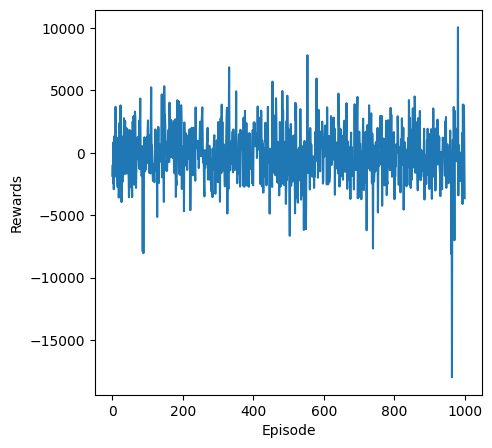

-644


In [7]:
train_v1(env, agent, max_episode_num = 1000, max_steps = 1000, save_file = "DQN_v1",
            e_greedy = 1, e_max = 1, e_min = 0.1, e_decay_rate = 0.01, show_every = 25, save_every = 100, clip_update=10)

episode, total_reward = run_fixed_episode(env, agent, max_steps = 1000, init_state = 1)
print(total_reward)
render(episode, env)